<a href="https://colab.research.google.com/github/aniket-alt/Clustering_Assignment/blob/main/Task(a)_Clustering_Basics_KMeans_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Model Evaluation ---
Inertia (SSE): 341.60
Silhouette Score: 0.8757


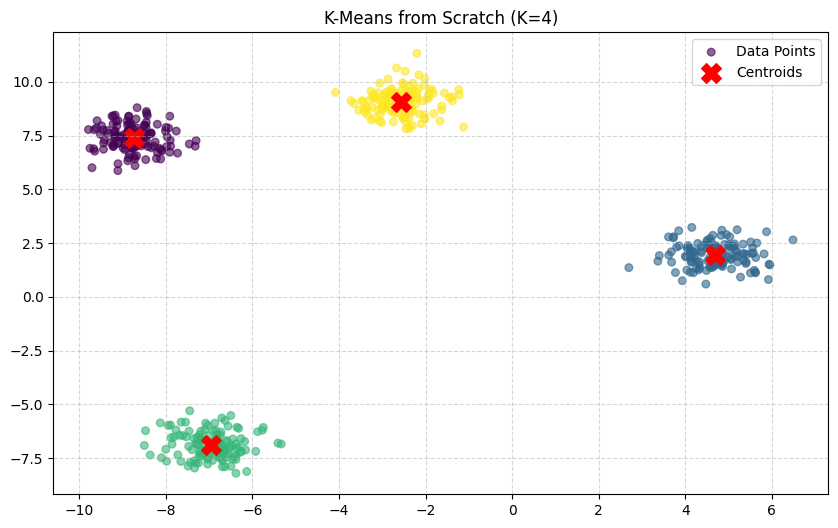

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# 1. THE CUSTOM K-MEANS CLASS
class KMeansFromScratch:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia_ = None

    def fit(self, X):
        # Step 1: Initialize centroids randomly from the data
        random_idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_idx]

        for i in range(self.max_iters):
            # Step 2: Assign labels based on closest centroid
            # We use broadcasting to calculate distances efficiently
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)

            # Step 3: Update centroids (Mean of assigned points)
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # Check for convergence (if centroids move less than tolerance)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        # Calculate final Inertia (Sum of Squared Errors)
        self.inertia_ = np.sum([np.sum((X[self.labels == j] - self.centroids[j])**2) for j in range(self.k)])
        return self

# 2. GENERATE SYNTHETIC DATA
# We create 4 distinct groups to see how K-Means handles it
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# 3. RUN OUR MODEL
k_value = 4
model = KMeansFromScratch(k=k_value)
model.fit(X)

# 4. QUALITY MEASURES
sil_score = silhouette_score(X, model.labels)
print(f"--- Model Evaluation ---")
print(f"Inertia (SSE): {model.inertia_:.2f}")
print(f"Silhouette Score: {sil_score:.4f}")

# 5. VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.labels, s=30, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f"K-Means from Scratch (K={k_value})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()